## <u>Solution Part 1</u>
Below is a notebook that explores several intricacies that can be used to improve the performace of a Convolutional Neural Network which is tested on the CIFAR-10 image classification problem. I have toyed with several techniques such as
* Introducing Batch normalisation
* Introducing Dropout
* Increasing the Deepth of Neural Network
* Hyperparameters tuning<br>


I will take these learnings and their results and implement a solution in <u>Solution Part 2 </u> notebook

In [2]:
# Import necessary Dependancies

import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import PIL

In [6]:
import matplotlib
print(tf.__version__)
print(np.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(PIL.__version__)

2.1.0
1.18.5
2.2.4-tf
3.2.2
7.2.0


Since the device I use has access to GPU I can check and use it by confirming the correct compatiability structure. <br>
My device's specifications :
* GPU : NVIDIA GeForce GTX 1060
* VRAM : 6 GB
* Memory : 16 GB
* Processor : Intel i7-7700HQ

In [2]:
if tf.test.is_gpu_available():
    print("\n\nGPU Available Yay\n")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("GPU Unavailable :c")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available Yay

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### <br>CIFAR 10
Now we load the dataset. Note that this is already included with keras.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

We will now create a simple vanilla model

In [5]:
input_img = keras.layers.Input((32, 32, 3), name = "img")
n_filters = 16

def make_model(input_img, n_filters = 16):
    c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu',)(input_img)
    p1 = keras.layers.MaxPooling2D((2,2))(c1)

    c2 = keras.layers.Conv2D(n_filters*2, (3,3), padding='same', activation='relu')(p1)
    p2 = keras.layers.MaxPooling2D((2,2))(c2)

    c3 = keras.layers.Conv2D(n_filters*2, (3,3), padding='same', activation='relu')(p2)
    flat = keras.layers.Flatten()
    flattened = flat(c3)
    d1 = keras.layers.Dense(64, activation='relu')(flattened)
    d2 = keras.layers.Dense(10, activation='softmax')(d1)
    model = models.Model(inputs=[input_img], outputs=[d2])
    return model

model = make_model(input_img)
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0     

In [6]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 184us/sample - loss: 1.4833 - accuracy: 0.4639 - val_loss: 1.1992 - val_accuracy: 0.5755
Epoch 2/10
50000/50000 [==============================] - 7s 148us/sample - loss: 1.1065 - accuracy: 0.6054 - val_loss: 1.1001 - val_accuracy: 0.6049
Epoch 3/10
50000/50000 [==============================] - 8s 151us/sample - loss: 0.9617 - accuracy: 0.6609 - val_loss: 0.9524 - val_accuracy: 0.6643
Epoch 4/10
50000/50000 [==============================] - 8s 163us/sample - loss: 0.8692 - accuracy: 0.6949 - val_loss: 0.9423 - val_accuracy: 0.6705
Epoch 5/10
50000/50000 [==============================] - 8s 155us/sample - loss: 0.7979 - accuracy: 0.7203 - val_loss: 0.9003 - val_accuracy: 0.6845
Epoch 6/10
50000/50000 [==============================] - 8s 157us/sample - loss: 0.7374 - accuracy: 0.7411 - val_loss: 0.8968 - val_accuracy: 0.6909
Epoch 7/10
50000/50000 [==========================

10000/10000 - 1s - loss: 0.9717 - accuracy: 0.6956


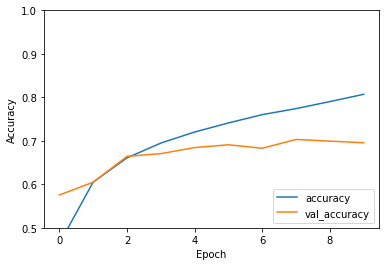

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Next we introduce batch normalisation and dropout and assess its performance

In [8]:
input_img = keras.layers.Input((32, 32, 3), name = "img")
n_filters = 16
def make_model(input_img, n_filters = 16):
    c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same')(input_img)
    c1 = keras.layers.BatchNormalization()(c1)
    c1 = keras.layers.Activation('relu')(c1)
    p1 = keras.layers.MaxPooling2D((2,2))(c1)
    p1 = keras.layers.Dropout(0.1)(p1)

    c2 = keras.layers.Conv2D(n_filters*2, (3,3), padding='same')(p1)
    c2 = keras.layers.BatchNormalization()(c2)
    c2 = keras.layers.Activation('relu')(c2)
    p2 = keras.layers.MaxPooling2D((2,2))(c2)
    p2 = keras.layers.Dropout(0.1)(p2)

    c3 = keras.layers.Conv2D(n_filters*2, (3,3), padding='same')(p2)
    c3 = keras.layers.BatchNormalization()(c3)
    c3 = keras.layers.Activation('relu')(c3)
    
    flat = keras.layers.Flatten()
    flattened = flat(c3)
    
    d1 = keras.layers.Dense(64, activation='relu')(flattened)
    d2 = keras.layers.Dense(10, activation='softmax')(d1)
    model = models.Model(inputs=[input_img], outputs=[d2])
    return model

model = make_model(input_img)
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640

In [9]:
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 190us/sample - loss: 1.3511 - accuracy: 0.5152 - val_loss: 2.2388 - val_accuracy: 0.3490
Epoch 2/10
50000/50000 [==============================] - 9s 177us/sample - loss: 1.0079 - accuracy: 0.6442 - val_loss: 1.1495 - val_accuracy: 0.6103
Epoch 3/10
50000/50000 [==============================] - 9s 175us/sample - loss: 0.8934 - accuracy: 0.6879 - val_loss: 1.0074 - val_accuracy: 0.6517
Epoch 4/10
50000/50000 [==============================] - 9s 175us/sample - loss: 0.8229 - accuracy: 0.7099 - val_loss: 0.9616 - val_accuracy: 0.6660
Epoch 5/10
50000/50000 [==============================] - 9s 174us/sample - loss: 0.7742 - accuracy: 0.7306 - val_loss: 0.9244 - val_accuracy: 0.6814
Epoch 6/10
50000/50000 [==============================] - 9s 175us/sample - loss: 0.7330 - accuracy: 0.7421 - val_loss: 0.9154 - val_accuracy: 0.6910
Epoch 7/10
50000/50000 [==========================

<br>There's a slight improvement int the results which can be credited to batch normalisation by removing vanishing/exploding gradient problem

10000/10000 - 1s - loss: 0.8004 - accuracy: 0.7349


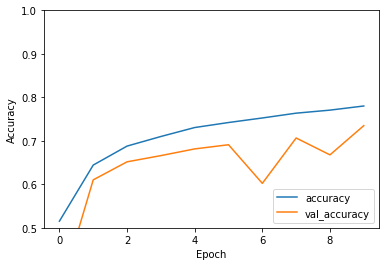

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

<br>Finnaly we attempt at incresing the depth of the neural network by adding more convolutional layers in the hope that the model will be better able to pick up more comple features of the image.

In [11]:
input_img = keras.layers.Input((32, 32, 3), name = "img")

def make_model(input_img, n_filters = 16):
    c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation=None)(input_img)
    c1 = keras.layers.BatchNormalization()(c1)
    c1 = keras.layers.Activation('relu')(c1)
    p1 = keras.layers.MaxPooling2D((2,2))(c1)
    p1 = keras.layers.Dropout(0.1)(p1)

    c2 = keras.layers.Conv2D(n_filters*2, (3,3), padding='same', activation=None)(p1)
    c2 = keras.layers.BatchNormalization()(c2)
    c2 = keras.layers.Activation('relu')(c2)
    p2 = keras.layers.MaxPooling2D((2,2))(c2)
    p2 = keras.layers.Dropout(0.1)(p2)

    c3 = keras.layers.Conv2D(n_filters*4, (3,3), padding='same', activation=None)(p2)
    c3 = keras.layers.BatchNormalization()(c3)
    c3 = keras.layers.Activation('relu')(c3)
    p3 = keras.layers.MaxPooling2D((2,2))(c3)
    p3 = keras.layers.Dropout(0.1)(p3)
    
    c4 = keras.layers.Conv2D(n_filters*8, (3,3), padding='same', activation=None)(p3)
    c4 = keras.layers.BatchNormalization()(c4)
    c4 = keras.layers.Activation('relu')(c4)
    p4 = keras.layers.MaxPooling2D((2,2))(c4)
    p4 = keras.layers.Dropout(0.1)(p4)
    
    flat = keras.layers.Flatten()
    flattened = flat(p4)
    
    d1 = keras.layers.Dense(64, activation='relu')(flattened)
    d2 = keras.layers.Dense(10, activation='softmax')(d1)
    model = models.Model(inputs=[input_img], outputs=[d2])
    return model
model = make_model(input_img)
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640

In [12]:
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_images, train_labels, epochs = 15, validation_data = (test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 220us/sample - loss: 1.4032 - accuracy: 0.4945 - val_loss: 1.1213 - val_accuracy: 0.5964
Epoch 2/15
50000/50000 [==============================] - 10s 195us/sample - loss: 1.0657 - accuracy: 0.6214 - val_loss: 1.1753 - val_accuracy: 0.5946
Epoch 3/15
50000/50000 [==============================] - 10s 195us/sample - loss: 0.9380 - accuracy: 0.6697 - val_loss: 0.8900 - val_accuracy: 0.6883
Epoch 4/15
50000/50000 [==============================] - 10s 199us/sample - loss: 0.8552 - accuracy: 0.6972 - val_loss: 0.8700 - val_accuracy: 0.7006
Epoch 5/15
50000/50000 [==============================] - 10s 195us/sample - loss: 0.7973 - accuracy: 0.7180 - val_loss: 0.9734 - val_accuracy: 0.6718
Epoch 6/15
50000/50000 [==============================] - 10s 195us/sample - loss: 0.7506 - accuracy: 0.7360 - val_loss: 0.8296 - val_accuracy: 0.7149
Epoch 7/15
50000/50000 [====================

In [13]:
model1 = model
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(train_images, train_labels, epochs = 4, validation_data = (test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 12s 248us/sample - loss: 0.5392 - accuracy: 0.8123 - val_loss: 0.7144 - val_accuracy: 0.7591
Epoch 2/4
50000/50000 [==============================] - 11s 225us/sample - loss: 0.5142 - accuracy: 0.8179 - val_loss: 0.8159 - val_accuracy: 0.7200
Epoch 3/4
50000/50000 [==============================] - 11s 226us/sample - loss: 0.5100 - accuracy: 0.8202 - val_loss: 0.6661 - val_accuracy: 0.7719
Epoch 4/4
50000/50000 [==============================] - 12s 234us/sample - loss: 0.5051 - accuracy: 0.8207 - val_loss: 0.7130 - val_accuracy: 0.7623


<br> We can see that the model improved upon deepening. The increase in accuracy doesn't have to be much. It just serves as proof of concept that our proposed changes bring improvement to the model.

10000/10000 - 1s - loss: 0.7130 - accuracy: 0.7623


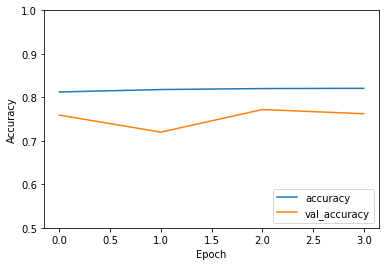

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

One noteable detail is the difference between the accuracy on training set and validation set. The gap suggests a possibility of overfitting and will be addressed in the <u>Solution Part 2</u>.

In [15]:
tf.keras.models.save_model(model, 'my_mod.h5')


<br>Now we know for sure that the following work as a solution
* Introducing Batch normalisation
* Introducing Dropout
* Increasing the Deepth of Neural Network
* Hyperparameters tuning<br>

So it's time to test them out by combining and forming an improved model that will be able to 

## <u>Solution Part 2</u>
As discussed earlier, we need to solve the problem of overfitting (high variance).<br>
This can be done by
* Enhancing Model
* Regularisation
* Adding more training data

In this section we will be taking more hyperparameter tuning into our ow hands and find an optimum stall that can maximise our model's generalisation capabilities.<br>
<br>Since we have tried enhancing the model by adding more convolutional layers and also introducing regularization, the only method left is to add more training data. But since we cannot annotate and add more training data to our model because A) It is tedious and difficult and B) It won't be a fair comparision for participants who are working on the same dataset, we should devise a method to do so. <br>
This is where data augmentation comes in. <br>

In [16]:
def conv_blocks(c_in, n_filters):
    c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation=None)(c_in)
    c1 = keras.layers.Activation('relu')(c1)
    c1 = keras.layers.BatchNormalization()(c1)
    c1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation=None)(c1)
    c1 = keras.layers.Activation('relu')(c1)
    c1 = keras.layers.BatchNormalization()(c1)
    c1 = keras.layers.MaxPooling2D((2,2))(c1)
    c1 = keras.layers.Dropout(0.25)(c1)
    return c1

In [17]:
input_img = keras.layers.Input((32, 32, 3), name = "img")

def make_model(input_img, n_filters = 64):
    c1 = conv_blocks(input_img, n_filters = n_filters)
    c2 = conv_blocks(c1, n_filters = 2*n_filters)
    c3 = conv_blocks(c2, n_filters = 4*n_filters)
    c4 = conv_blocks(c3, n_filters = 8*n_filters)
    
    flat = keras.layers.Flatten()
    flattened = flat(c4)
    
    d1 = keras.layers.Dense(256, activation='relu')(flattened)
    d2 = keras.layers.Dense(10, activation='softmax')(d1)
    model = models.Model(inputs=[input_img], outputs=[d2])
    return model

model = make_model(input_img)
model.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256 

<br>A fairly larger model is created with more features extracted by each convolutional filters.<br>
<br>I have chosen ImageDataGenerator for data augmentaion as it operates within the model pipeline which I will explain later why is better for our case.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

In [19]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [20]:
# Normalising the input to a scaled range will add an affect similar to regularisation
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [25]:
# Definig Data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [22]:
# To avoid overfitting I've decided to reduce the learning rate one a certain number of epochs have completed

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 65:
        lrate = 0.0005
    if epoch > 85:
        lrate = 0.0003
    return lrate

Note that in the following cell, the number of epochs are very huge (100). This is done intentionally and is concluded safe to do because as discussed earlier ImageDataGenerator performs augmentations in real time as it is fetching data for each forward pass. So the model is fairly seeing new images at every step.

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
callback_list = [LearningRateScheduler(lr_schedule), es]

In [26]:
#Selection of RMS over Adam or vice versa for optimisation was purely experimental and results for which is superior is yet to be decided.

opt_adam = keras.optimizers.Adam(lr=0.001,decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])
batch_size = 256
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size, epochs=100,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=callback_list)

  ...
    to  
  ['...']
Train for 195 steps, validate on 10000 samples
Epoch 1/100
195/195 [==============================] - 25s 128ms/step - loss: 0.6274 - accuracy: 0.7892 - val_loss: 10.0170 - val_accuracy: 0.2006
Epoch 2/100
195/195 [==============================] - 26s 134ms/step - loss: 0.5581 - accuracy: 0.8097 - val_loss: 0.8265 - val_accuracy: 0.7171
Epoch 3/100
195/195 [==============================] - 26s 134ms/step - loss: 0.4923 - accuracy: 0.8316 - val_loss: 0.5575 - val_accuracy: 0.8095
Epoch 4/100
195/195 [==============================] - 26s 133ms/step - loss: 0.4604 - accuracy: 0.8413 - val_loss: 0.4984 - val_accuracy: 0.8361
Epoch 5/100
195/195 [==============================] - 27s 137ms/step - loss: 0.4286 - accuracy: 0.8524 - val_loss: 0.5180 - val_accuracy: 0.8313
Epoch 6/100
195/195 [==============================] - 26s 135ms/step - loss: 0.4094 - accuracy: 0.8581 - val_loss: 0.4691 - val_accuracy: 0.8433
Epoch 7/100
195/195 [==============================

In [27]:
# Create a copy for further experimentation
best_mod = model

10000/10000 - 3s - loss: 0.3646 - accuracy: 0.9014


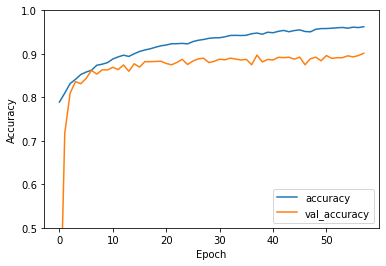

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [29]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

10000/10000 [==============================] - 2s 181us/sample - loss: 0.3646 - accuracy: 0.9014


In [30]:
print('Accuracy :', scores[1])
print('Loss :', scores[0])

Accuracy : 0.9014
Loss : 0.36459361381530764
